In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import tensorflow as tf 
from tensorflow import keras
RANDOM = 40
np.random.seed(RANDOM)
tf.random.set_seed(RANDOM)

In [44]:
dfLoanData = pd.read_csv("LoanDataExample.csv")

In [45]:
dfLoanData.shape

(9578, 14)

In [46]:
dfLoanData.head(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [47]:
dfLoanData.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [48]:
dfLoanData.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [49]:
dfLoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [50]:
def calcPercent(n1, n2):
    percent = ((n1 / n2) * 100)
    return percent

In [51]:
debt, settled = dfLoanData['not.fully.paid'].value_counts()
print(f'Debt {debt}')
print(f'Paid {settled}')
print(f' Loan Ratio {round(calcPercent(settled, settled + debt), 2)}%')

Debt 8045
Paid 1533
 Loan Ratio 16.01%


<AxesSubplot: xlabel='not.fully.paid', ylabel='count'>

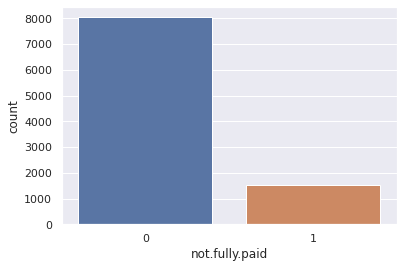

In [52]:
sns.countplot(x='not.fully.paid',data = dfLoanData)

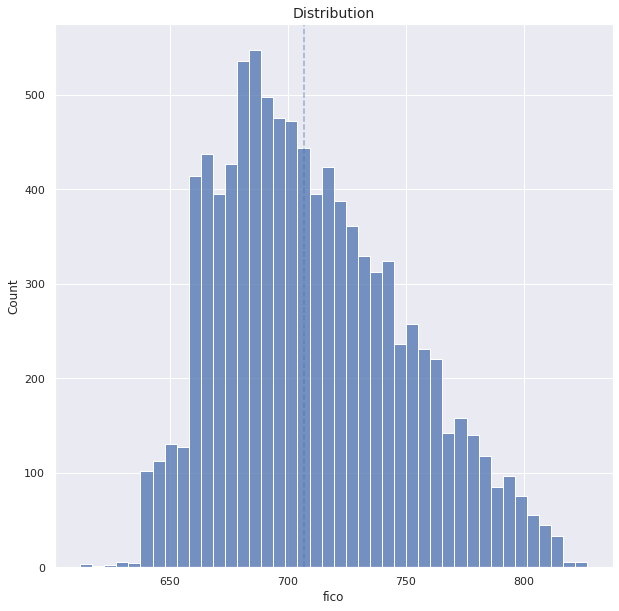

In [53]:
fig, (ax1) = plt.subplots(1, 1, figsize = (10, 10))
sns.histplot(dfLoanData["fico"], ax=ax1)
ax1.set_title("Distribution", fontsize = 14);
ax1.axvline(x=dfLoanData["fico"].median(), linestyle="--", alpha = 0.5)

<AxesSubplot: >

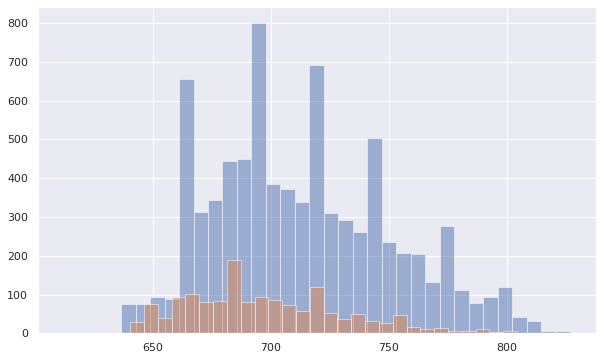

In [54]:
plt.figure(figsize=(10,6))
dfLoanData[dfLoanData['not.fully.paid']==0]['fico'].hist(bins=35, alpha=0.5, label='not.fully.paid')
dfLoanData[dfLoanData['not.fully.paid']==1]['fico'].hist(bins=35, alpha=0.5, label='not.fully.paid')

<AxesSubplot: >

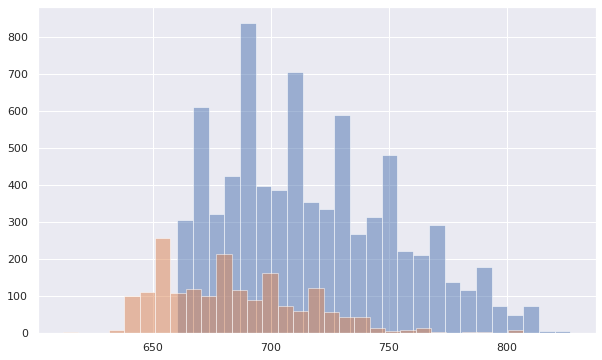

In [55]:
plt.figure(figsize=(10,6))
dfLoanData[dfLoanData['credit.policy']==1]['fico'].hist(bins=30, alpha=0.5, label='credit.policy')
dfLoanData[dfLoanData['credit.policy']==0]['fico'].hist(bins=30, alpha=0.5, label='credit.policy')

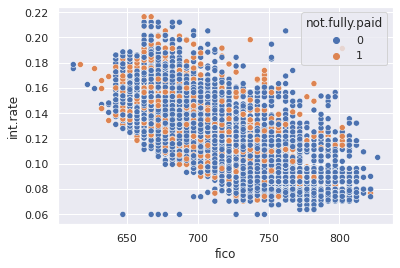

In [56]:
sns.scatterplot(x = "fico", y = "int.rate", data = dfLoanData, hue = "not.fully.paid");

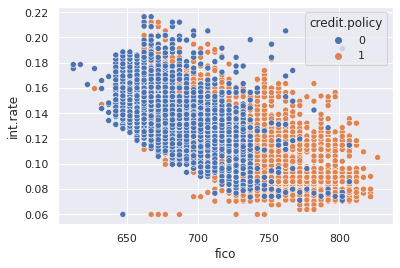

In [57]:
sns.scatterplot(x = "fico", y = "int.rate", data = dfLoanData, hue = "credit.policy");

In [58]:
rows = dfLoanData.shape[0]
for i in dfLoanData.columns:
    count = dfLoanData[dfLoanData[i]==-1][i].count()
    if count > 0:
        print(f'{i} - {count} ({rount(calcPercent(count, rows), 3)}%) rows missed')
    else:
        print(f'{i} ''has no data missing')

credit.policy has no data missing
purpose has no data missing
int.rate has no data missing
installment has no data missing
log.annual.inc has no data missing
dti has no data missing
fico has no data missing
days.with.cr.line has no data missing
revol.bal has no data missing
revol.util has no data missing
inq.last.6mths has no data missing
delinq.2yrs has no data missing
pub.rec has no data missing
not.fully.paid has no data missing


In [59]:
categorical_columns = ['purpose']

In [60]:
final_data = pd.get_dummies(dfLoanData, columns=categorical_columns, drop_first=True)

In [61]:
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [62]:
final_data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [67]:
from sklearn.model_selection import train_test_split
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state = 5)

In [68]:
def make_model(train_data, metrics=["accuracy"]):
    model = keras.Sequential([
        keras.layers.Dense(
        units = 36,
        activation='relu',
        input_shape=(train_data.shape[-1],)
        ),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=1, activation='sigmoid'),
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate = 0.001),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)
    return model

In [69]:
SIZE = 100
model = make_model(x_train)
history = model.fit(
    x_train, y_train,batch_size=SIZE, epochs=20, validation_split=0.05, shuffle=True, verbose=0)

In [70]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 36)                684       
                                                                 
 batch_normalization_6 (Bat  (None, 36)                144       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 36)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 37        
                                                                 
Total params: 865 (3.38 KB)
Trainable params: 793 (3.10 KB)
Non-trainable params: 72 (288.00 Byte)
_________________________________________________________________


In [74]:
def accuracy(history):
    history1 = pd.DataFrame(history.history)
    history1['epoch'] = history.epoch
    plt.figure()
    plt.plot(history1['epoch'], history1['accuracy'], label='Train Accuracy')
    plt.plot(history1['epoch'], history1['val_accuracy'], label='Val Accuracy')
    plt.ylim((0,1))
    plt.legend()
    plt.show()

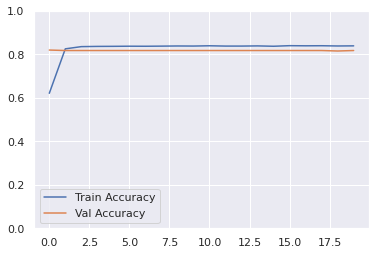

In [75]:
accuracy(history)

In [76]:
model.evaluate(x_test, y_test, batch_size=SIZE)

5/5 [==============================] - 0s 1ms/step - loss: 0.5504 - accuracy: 0.8476


[0.5504340529441833, 0.8475991487503052]